#GET DATA

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=a3a6030f5588e8ac81f167d76b43a673ec7ae21739baffbe84db31fafae309f8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
from bs4 import BeautifulSoup
import requests
import wget
def get_soup(url, header):
    return BeautifulSoup(requests.get(url,headers=header).content,'html.parser')    


query = "lee seung gi"
query = query.split()
query = '+'.join(query)
url = "https://www.google.co.in/search?q="+query+"&source=lnms&tbm=isch"
headers = {}
headers['User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
soup = get_soup(url, headers)


In [ ]:
def save_img(url, dir, name):
    img_data = requests.get(url).content
    with open(dir+str(name)+'.jpg', 'wb+') as handler:
        handler.write(img_data)

In [ ]:
import os
dir = '/content/drive/My Drive/data/face/lee_seung_gi/'
i = 0
if not os.path.exists(dir):
    os.mkdir(dir)
for a in soup.find_all('img'):
    if 'data-src' in a.attrs:
        i+=1
        save_img(a.attrs['data-src'], dir, i)
    if i == 100:
        break

In [ ]:
soup.find_all('img')

In [ ]:
path = '/content/drive/My Drive/data/face/nface/'

In [ ]:
!git clone https://github.com/phamdinhkhanh/FacenetDataset.git path

Cloning into 'path'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 167 (delta 6), reused 161 (delta 0), pack-reused 0
Receiving objects: 100% (167/167), 28.37 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (6/6), done.


#PROCESSING

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = '/content/drive/My Drive/data/face_detect/'
datas = []
labels = []
c = -1
label_name = {}
for name in sorted(os.listdir(path)):
    label = []
    data = []
    c += 1
    label_name[c] = name
    for name_img in os.listdir(path+name):
        img = cv2.imread(path+name+'/'+name_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(c)
    if len(data) == 0:
        c-=1
        continue
    labels.append(label)
    datas.append(data)

In [ ]:
X_train, X_test, y_train, y_test = [], [], [], []
for d, l in zip(datas, labels):
    X_train.append(d[:30])
    y_train.append(l[:30])
    if len(d[30:]) > 0:
        X_test.append(d[30:])
        y_test.append(l[30:])

In [ ]:
def convert21D(array):
    X = []
    for x in array:
        X.extend(x)
    return X

In [ ]:
X_train = convert21D(X_train)
y_train = convert21D(y_train)
X_test = convert21D(X_test)
y_test = convert21D(y_test)

In [ ]:
label_name

{0: 'lee_seung_gi', 1: 'song_ji_hyo'}

0


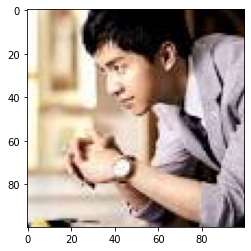

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_test[22])

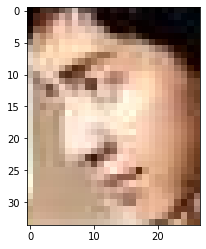

In [ ]:
bbox = MTCNN().detect_faces(X_train[0])
box=[]
if len(bbox)>0:
    for b in bbox:
        box.append(b['box'])
    plt.imshow(get_face(box[0], X_train[0]))

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [ ]:
from mtcnn import MTCNN
from tqdm.notebook import tqdm

def get_boundingbox(images):
    bboxs = []
    for idx, img in tqdm(enumerate(images)):
      bbox = MTCNN().detect_faces(img)
      if len(bbox) > 0:
        box = []
        for b in bbox:
            box.append(b['box'])
        bboxs.append(box)
        continue
      bboxs.append(0)
    return bboxs

In [ ]:
def get_face(boundingbox, image):
    (startY, startX, endY, endX) = boundingbox
    minX, maxX = max(startX, 0), startX+endX
    minY, maxY = max(startY, 0), startY+endY
    face = image[minX:maxX, minY:maxY]
    return face

In [ ]:
bboxs_train = get_boundingbox(X_train)

In [ ]:
bboxs_test = get_boundingbox(X_test)

In [ ]:
def convert_face(bboxs, X):
    i = 0
    for bbox, img in zip(bboxs, X):
        if bbox == 0:
            continue
        result = []
        for box in bbox:
            image = get_face(box, img)
            re_img = cv2.resize(image, (224, 224))
            result.append(re_img)
        X[i] = result
        i+=1
    return X

In [ ]:
X = convert_face(bboxs_train, X_train)

In [ ]:
X1 = convert_face(bboxs_test, X_test)

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(20, 10))
for i in range(10):
    r = np.random.randint(0, 60)
    ax[i].imshow(X[r][0])
    ax[i].set_title(label_name[y_train[r]])

#Save face

In [ ]:
X = X+X1
y = y_train+y_test

In [ ]:
import os

path_to_face = '/content/drive/My Drive/data/face_detect/'
if not os.path.exists(path_to_face):
    os.mkdir(path_to_face)
count = 0
for name, face in zip(y, X):
    for per in face:
        url = path_to_face+label_name[name]
        count+=1
        if not os.path.exists(url):
            os.mkdir(url)
        per = cv2.cvtColor(per, cv2.COLOR_RGB2BGR)
        cv2.imwrite(url+'/'+str(count)+'.jpg', per) 

#CUTMIX

In [ ]:
!pip install cutmix_keras

In [ ]:
from tensorflow.keras.utils import to_categorical

y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)

In [ ]:
from cutmix_keras import CutMixImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True,
    rescale=1/255.
)

train_generator1 = train_datagen.flow_from_directory(
    '/content/drive/My Drive/data/face_detect',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,  
)

train_generator2 = train_datagen.flow_from_directory(
    '/content/drive/My Drive/data/face_detect',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)


train_generator = CutMixImageDataGenerator(
    generator1=train_generator1,
    generator2=train_generator2,
    img_size=224,
    batch_size=32,
)

Found 169 images belonging to 4 classes.
Found 169 images belonging to 4 classes.


In [ ]:
img, l = train_generator.__next__()

[1. 0. 0. 0.]


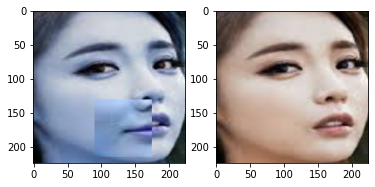

In [ ]:
plt.subplot(121)
img9 = (img[9]*255).astype(int)
print(l[9])
img9 = np.array(img9, dtype=np.uint8)
img9 = cv2.cvtColor(img9, cv2.COLOR_RGB2BGR)
plt.imshow(img9)
plt.subplot(122)
plt.imshow(X_test[7])

# cv2.imwrite('hong_jin_young_cutmix.png', img9)
# cv2.imwrite('hong_jin_young.png', cv2.cvtColor(X_test[7], cv2.COLOR_RGB2BGR))

#Train

In [ ]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)
X_train = X_train/255
X_test = X_test/255

In [ ]:
! pip install -U --pre efficientnet

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Lambda, Activation, Input
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [ ]:
import efficientnet.tfkeras as efn 

In [ ]:
model = Sequential()
model.add(efn.EfficientNetB2(weights=None, include_top=False, input_shape=(224, 224, 3)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Lambda(lambda x: tf.math.l2_normalize(x, axis = 1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b2 (Model)      (None, 7, 7, 1408)        7768562   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               180352    
_________________________________________________________________
lambda (Lambda)              (None, 128)               0         
Total params: 7,948,914
Trainable params: 7,881,346
Non-trainable params: 67,568
_________________________________________________________________


In [ ]:
import tensorflow_addons as tfa

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0003, decay=1e-6),
    loss=tfa.losses.TripletSemiHardLoss()
)

In [ ]:
y_train = np.array(y_train)

In [ ]:
gen_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).repeat().shuffle(1024).batch(16)

In [ ]:
history = model.fit(
    gen_train,
    steps_per_epoch=50,
    epochs=200)

Epoch 1/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7757
Epoch 2/200
50/50 [==============================] - 21s 417ms/step - loss: 0.7603
Epoch 3/200
50/50 [==============================] - 21s 419ms/step - loss: 0.7738
Epoch 4/200
50/50 [==============================] - 21s 416ms/step - loss: 0.7423
Epoch 5/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7368
Epoch 6/200
50/50 [==============================] - 21s 419ms/step - loss: 0.7404
Epoch 7/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7460
Epoch 8/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7461
Epoch 9/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7152
Epoch 10/200
50/50 [==============================] - 21s 419ms/step - loss: 0.7402
Epoch 11/200
50/50 [==============================] - 21s 418ms/step - loss: 0.7371
Epoch 12/200
50/50 [==============================] - 21s 419ms/step - loss: 0.7261
E

In [ ]:
history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=train_generator.get_steps_per_epoch(),
        epochs = 10
        )

#Summary

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def _most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[-9:]
  ls = []
  for i in argmax:
    ls.append(labels[i])
  ls = np.array(ls)
  u, c = np.unique(ls, return_counts = True)
  label = u[c == c.max()]
  return label

In [ ]:
X_train_vec = model.predict(X_train)
X_test_vec = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train_vec, vec, y_train)[0]
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))

0.25


In [ ]:
def test(x):
    sim = cosine_similarity(X_train_vec, X_test_vec[x].reshape(1, -1))
    sim = np.squeeze(sim, axis = 1)
    argmax = np.argsort(sim)[-9:]
    ls = []
    fig, ax =  plt.subplots(1, 10, figsize=(20, 10))
    for idx, i in enumerate(argmax):
        ls.append(y_train[i])
        ax[idx].imshow((X_train[i]*255).astype(int))
        text = label_name[ls[-1]]
        ax[idx].set_title(text)
    ls = np.array(ls)
    u, c = np.unique(ls, return_counts = True)
    y = u[c == c.max()]
    print('Result:', label_name[y[0]])
    print('Truth:', label_name[y_test[x]])
    plt.imshow((X_test[x]*255).astype(int))
    plt.title(label_name[y_test[x]])

Result: thaotam
Truth: iu


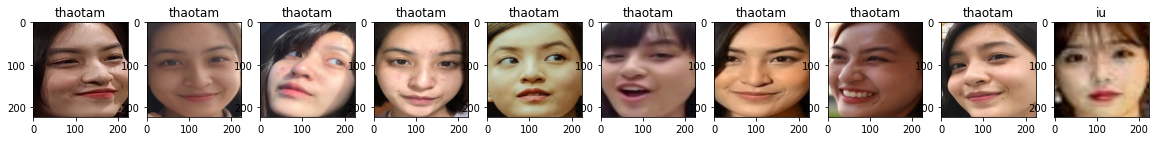

In [ ]:
test(9)

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf

path = '/content/drive/My Drive/data/face/face_detect/'
datas = []
labels = []
c = -1
label_name = {}
for name in sorted(os.listdir(path)):
    label = []
    data = []
    c += 1
    label_name[c] = name
    for name_img in os.listdir(path+name):
        img = cv2.imread(path+name+'/'+name_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(c)
    if len(data) == 0:
        c-=1
        continue
    labels.append(label)
    datas.append(data)

X_train, X_test, y_train, y_test = [], [], [], []
for d, l in zip(datas, labels):
    X_train.append(d[:30])
    y_train.append(l[:30])
    if len(d[30:]) > 0:
        X_test.append(d[30:])
        y_test.append(l[30:])

def convert21D(array):
    X = []
    for x in array:
        X.extend(x)
    return X

X_train = convert21D(X_train)
y_train = convert21D(y_train)
X_test = convert21D(X_test)
y_test = convert21D(y_test)
# X_train = np.stack(X_train)
# X_test = np.stack(X_test)
#
# X_train = X_train/255
# X_test = X_test/255
print(type(X_train), type(y_train))

def normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

<class 'list'> <class 'list'>


In [ ]:
gen_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1024).batch(32).map(normalize_img)

In [ ]:
!pip install -U efficientnet


  Found existing installation: efficientnet 0.0.4
    Uninstalling efficientnet-0.0.4:
      Successfully uninstalled efficientnet-0.0.4


In [ ]:


from tensorflow.keras.layers import Dense, Flatten, Lambda
from tensorflow.keras.models import Sequential
from efficientnet.tfkeras import EfficientNetB2


model = Sequential()
model.add(EfficientNetB2(include_top=False, weights=None, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(128))
model.add(Lambda(lambda x: tf.math.l2_normalize(x, axis = 1)))
model.summary()

import tensorflow_addons as tfa

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tfa.losses.TripletSemiHardLoss)


history = model.fit(
    gen_train,
    epochs=10)

from sklearn.metrics.pairwise import cosine_similarity

def _most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1]
  label = [labels[idx] for idx in argmax][0]
  return label

X_train_vec = model.predict(X_train)
X_test_vec = model.predict(X_test)

from sklearn.metrics import accuracy_score

y_preds = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train_vec, vec, y_train)
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b2 (Model)      (None, 7, 7, 1408)        7768562   
_________________________________________________________________
flatten (Flatten)            (None, 68992)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8831104   
_________________________________________________________________
lambda (Lambda)              (None, 128)               0         
Total params: 16,599,666
Trainable params: 16,532,098
Non-trainable params: 67,568
_________________________________________________________________
Epoch 1/10


TypeError: ignored

In [ ]:
import tensorflow as tf

tf.meshgrid(6, 6)

[<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[6]], dtype=int32)>]